<div align="center">
Trace theory - Adrian Glanowski
</div>

In [1]:
import networkx as nx
import re
import matplotlib.pyplot as plt

In [2]:
class NoMoreEquationsException(Exception):
    pass

In [3]:
class Equation:

    def __init__(self, line: str):
        values = self.parse(line)
        self.action = values[0]
        self.left = values[1]
        self.right = values[2]

    def parse(self, line: str):
        line = line.replace(" ", "")
        variable = r"[a-z]"
        multiplied_variable = fr"\d*{variable}"
        operator = r"(\+|-|\\|\*)"

        full_pattern = re.compile(fr"\((?P<action>{variable})\)(?P<left>{variable}):={multiplied_variable}({operator}{multiplied_variable})*")
        
        match = full_pattern.match(line)
        if match is None: 
            raise NoMoreEquationsException
        
        dict_val = match.groupdict()
        variable_list = []
        variables = re.finditer(variable, line.split(":=")[1])
        for variable_match in variables:
            char = variable_match.group()[-1]
            variable_list.append(char)

        return dict_val["action"], dict_val["left"], variable_list

    def full_repr(self):
        return f"({self.action}) {self.left} := {self.right}"

    def __repr__(self):
        return f"{self.action}"


In [ ]:
class Solution:

    def __init__(self, file_name):
        self.equations = []
        with open(f"examples/{file_name}.txt", "r") as f:
            while True:
                line = f.readline()
                try:
                    self.equations.append(Equation(line))
                except NoMoreEquationsException:
                    word = f.readline().replace(" ", "").split("=")[1]
                    break
                  
        self.word = word
    
    def create_dependency_relation(self):
        self.dependent = []
        for i in range(len(self.equations)):
            for j in range(i, len(self.equations)):
                eq1 = self.equations[i]
                eq2 = self.equations[j]
                
                eq1_all_variables = set(eq1.left) | set(eq1.right)
                eq2_all_variables = set(eq2.left) | set(eq2.right)
                
                if self.equations[i].left in eq2_all_variables or self.equations[j].left in eq1_all_variables:
                    self.dependent.append((eq1, eq2))
        

    def create_independency_relation(self):
        self.independent = [(self.equations[i], self.equations[j]) 
                            for i in range(len(self.equations)) 
                                for j in range(i+1, len(self.equations)) 
                                    if (self.equations[i], self.equations[j]) not in self.dependent]

    def create_word_graph(self):
        edges = []
        for i in range(len(self.word)):
            for j in range(i+1, len(self.word)):
                if (self.word[i], self.word[j]) in map(lambda x: (x[0].action, x[1].action), self.dependent) or (self.word[j], self.word[i]) in map(lambda x: (x[0].action, x[1].action), self.dependent):
                    edges.append((i, j))

        self.graph = nx.DiGraph(edges)

    def create_diekerts_graph(self):
        self.diekerts_graph = nx.transitive_reduction(self.graph)

    def create_FNF(self):
        self.topology = list(nx.topological_generations(self.diekerts_graph))

    def FNF_string(self):
        topology_layer = ["".join(map(lambda x: self.word[x], array)) for array in self.topology]
        all_layers = [f"[{"".join(x)}]" for x in topology_layer]
        return "".join(all_layers)
    
    def solve(self):
        self.create_dependency_relation()
        self.create_independency_relation()
        self.create_word_graph()
        self.create_diekerts_graph()
        self.create_FNF()

    def dag_layout(self, G):
        """Simple top-to-bottom layout for a DAG using topological order."""
        layers = list(nx.topological_generations(G))
        pos = {}
        for i, layer in enumerate(layers):
            for j, node in enumerate(layer):
                pos[node] = (j, -i)  # spread nodes horizontally, layers vertically
        return pos
    
    def show_graph(self, graph):
        nx.draw(graph, pos=self.dag_layout(graph), with_labels=True, arrows=True)
        plt.show()

    def __repr__(self):
        return f"{"\n".join([str(x) for x in self.equations])}"

In [ ]:
sol = Solution("case1")

In [6]:
sol.create_dependency_relation()
sol.create_independency_relation()

In [7]:
sol.create_word_graph()

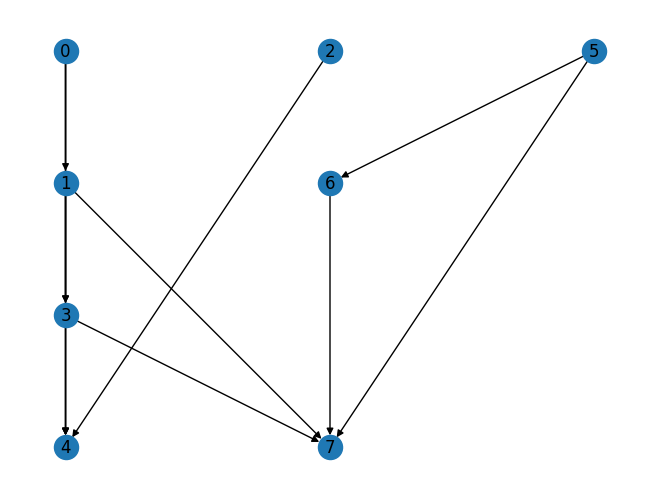

In [8]:
nx.draw(sol.graph, pos=sol.dag_layout(sol.graph), with_labels=True, arrows=True)

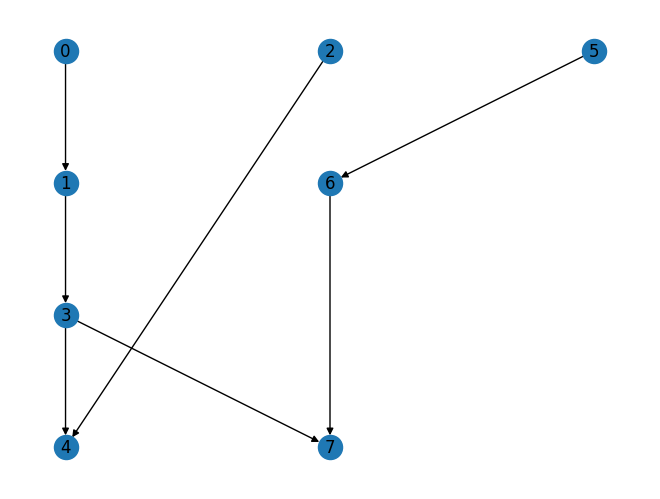

In [9]:
sol.create_diekerts_graph()
sol.show_graph(sol.diekerts_graph)

In [10]:
sol.create_FNF()

In [11]:
print(sol.FNF_string())

[adb][cb][c][fe]


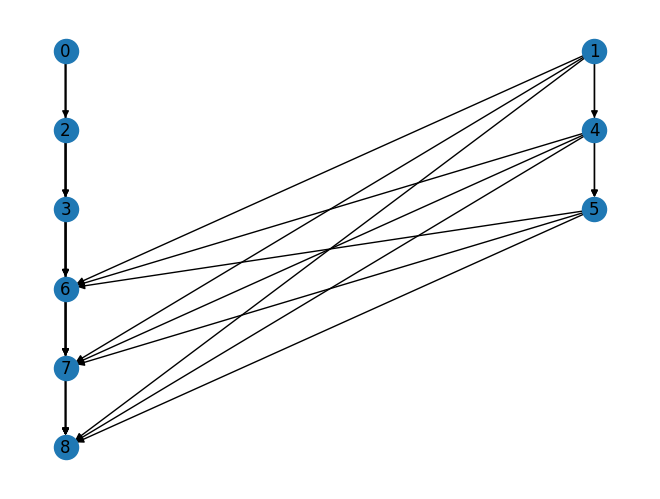

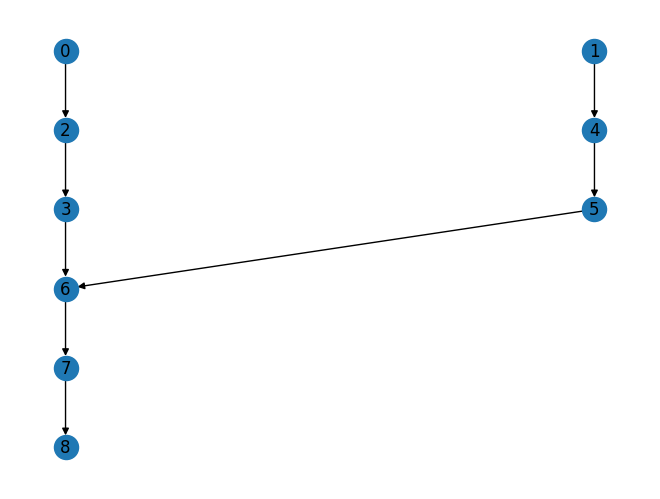

[af][af][ef][b][c][d]


In [12]:
case2 = Solution("case2")
case2.solve()
case2.show_graph(case2.graph)
case2.show_graph(case2.diekerts_graph)
print(case2.FNF_string())

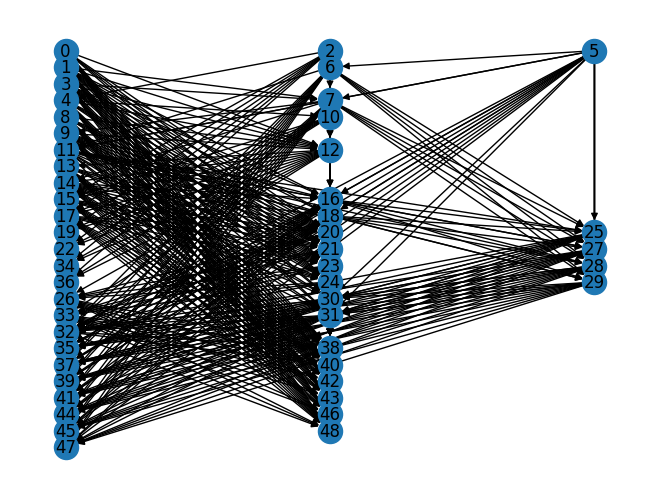

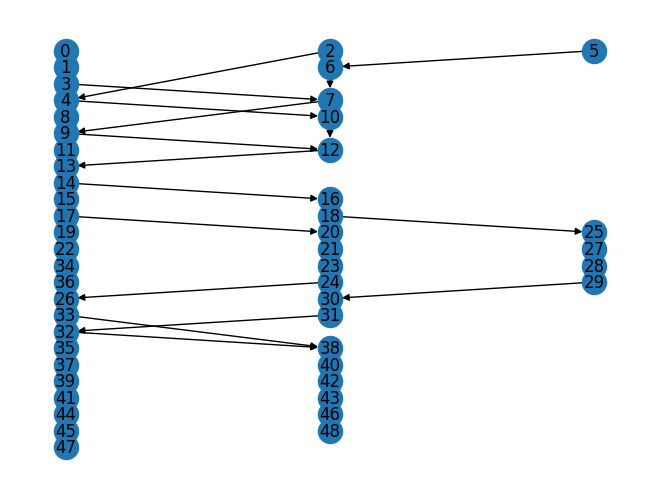

[adb][cb][c][fe][ad][c][ef][a][c][fe][fe][dcb][dab][dcb][dab][ae][ae][e][bc][bc][ba][ba][ba][bc][b]


In [13]:
case2 = Solution("case3")
case2.solve()
case2.show_graph(case2.graph)
case2.show_graph(case2.diekerts_graph)
print(case2.FNF_string())